#### Proyecto: Predicción de ingresos con el dataset Adult
#### Objetivo: Clasificar si una persona gana >50K usando regresión logística y random forest



In [2]:
import pandas as pd

# Ruta al archivo original descargado (asegurate que el archivo existe en esa ruta)
ruta_origen = "C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\census+income\\adult.data"

# Definición de los nombres de las columnas
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]

# Cargar el archivo y asignar nombres de columnas
df = pd.read_csv(ruta_origen, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# Mostrar los primeros registros para verificar
df.head(100)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [3]:
# Ruta donde querés guardar el nuevo archivo limpio (por ejemplo en la misma carpeta)
ruta_guardado = "C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\census+income\\adult_limpio.csv"

# Guardar como CSV limpio (sin el índice)
df.to_csv(ruta_guardado, index=False)

print(f"Archivo guardado en: {ruta_guardado}")


Archivo guardado en: C:\Users\abuen\OneDrive\00 - BUSINNESS INTELLIGENCE\MODULO_2\DATASET\census+income\adult_limpio.csv


In [4]:
# Visualizamos el shape del objeto
df.shape

(32561, 15)

In [5]:
# Visualizamos tipo de datos 
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
# Verificamos los valores missing 
# Porcentaje de valores nulos por columna
print((df.isnull().mean() * 100).round(2))


age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64


In [7]:
# Convertir la variable objetivo a binaria
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)




In [8]:
# Transformar todas las variables categóricas (de texto) en variables numéricas, 
# que es lo que los modelos de machine learning necesitan para trabajar.
categorical = df.select_dtypes(include='object').columns
numeric = df.select_dtypes(exclude='object').columns.drop('income')
df = pd.get_dummies(df, columns=categorical)


In [9]:
df.dtypes

age                               int64
fnlwgt                            int64
education_num                     int64
capital_gain                      int64
capital_loss                      int64
                                  ...  
native_country_Thailand            bool
native_country_Trinadad&Tobago     bool
native_country_United-States       bool
native_country_Vietnam             bool
native_country_Yugoslavia          bool
Length: 109, dtype: object

In [10]:
# verificamos
df.head(10)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,37,284582,14,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,49,160187,5,0,0,16,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,52,209642,9,0,0,45,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,31,45781,14,14084,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,42,159449,13,5178,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
# --- Paso 3: Separar en entrenamiento y prueba ---
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print("Distribución en y:", y.value_counts())
print("Distribución en y_train:", y_train.value_counts())
print("Distribución en y_test:", y_test.value_counts())


Distribución en y: income
0    24720
1     7841
Name: count, dtype: int64
Distribución en y_train: income
0    19778
1     6270
Name: count, dtype: int64
Distribución en y_test: income
0    4942
1    1571
Name: count, dtype: int64


In [13]:
# --- Paso 4: Entrenar modelos (sin balanceo en regresión logística) ---
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Escalar datos para regresión logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresión Logística sin class_weight
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Random Forest con class_weight balanceado
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
# --- Paso 5: Evaluación ---
from sklearn.metrics import accuracy_score, classification_report

# Predicciones
log_preds = log_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test)

# Evaluación
print("Regresión Logística:")
print(classification_report(y_test, log_preds))

print("Random Forest:")
print(classification_report(y_test, rf_preds))

Regresión Logística:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.75      0.61      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.63      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.86      6513



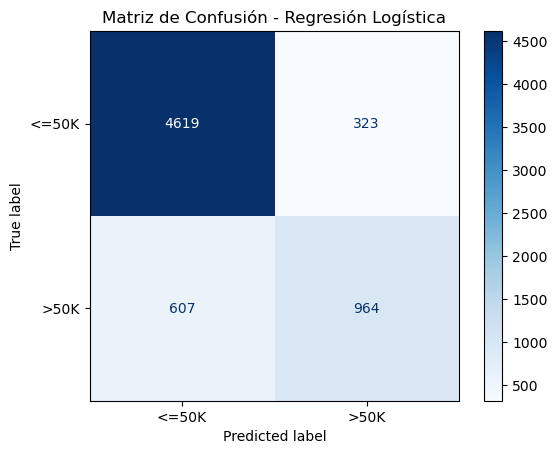

🧠 Interpretación de la matriz de confusión para Regresión Logística:
- Verdaderos Negativos (TN): 4619 → <=50K predichos correctamente.
- Falsos Positivos (FP): 323 → <=50K mal clasificados como >50K.
- Falsos Negativos (FN): 607 → >50K mal clasificados como <=50K.
- Verdaderos Positivos (TP): 964 → >50K predichos correctamente.
✅ Exactitud total: 85.72%



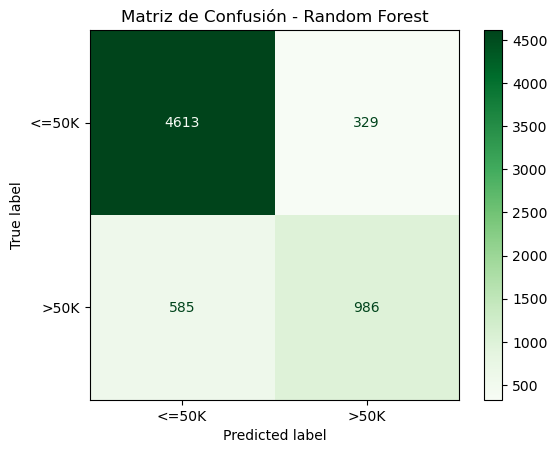

🧠 Interpretación de la matriz de confusión para Random Forest:
- Verdaderos Negativos (TN): 4613 → <=50K predichos correctamente.
- Falsos Positivos (FP): 329 → <=50K mal clasificados como >50K.
- Falsos Negativos (FN): 585 → >50K mal clasificados como <=50K.
- Verdaderos Positivos (TP): 986 → >50K predichos correctamente.
✅ Exactitud total: 85.97%



In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def interpretar_matriz_confusion(y_true, y_pred, modelo_nombre="Modelo", etiquetas=["<=50K", ">50K"], cmap=plt.cm.Blues):
    # Calcular matriz
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Mostrar gráfica
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)
    disp.plot(cmap=cmap)
    plt.title(f"Matriz de Confusión - {modelo_nombre}")
    plt.show()
    
    # Interpretación en texto
    print(f"🧠 Interpretación de la matriz de confusión para {modelo_nombre}:")
    print(f"- Verdaderos Negativos (TN): {tn} → {etiquetas[0]} predichos correctamente.")
    print(f"- Falsos Positivos (FP): {fp} → {etiquetas[0]} mal clasificados como {etiquetas[1]}.")
    print(f"- Falsos Negativos (FN): {fn} → {etiquetas[1]} mal clasificados como {etiquetas[0]}.")
    print(f"- Verdaderos Positivos (TP): {tp} → {etiquetas[1]} predichos correctamente.")
    
    total = tn + fp + fn + tp
    accuracy = (tn + tp) / total
    print(f"✅ Exactitud total: {accuracy:.2%}\n")

# --- Regresión Logística ---
interpretar_matriz_confusion(y_test, log_preds, modelo_nombre="Regresión Logística", cmap=plt.cm.Blues)

# --- Random Forest ---
interpretar_matriz_confusion(y_test, rf_preds, modelo_nombre="Random Forest", cmap=plt.cm.Greens)


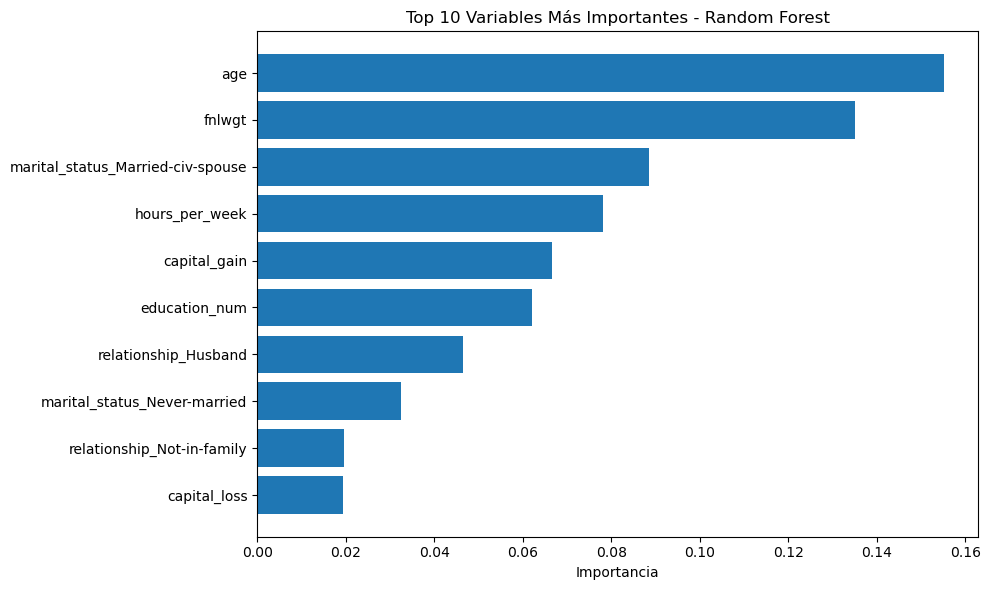

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener importancias
importances = rf_model.feature_importances_
feature_names = X.columns

# Ordenar de mayor a menor
indices = np.argsort(importances)[::-1]
top_n = 10  # Cambiá si querés ver más o menos

# Mostrar gráfico
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]][::-1])
plt.xlabel('Importancia')
plt.title('Top 10 Variables Más Importantes - Random Forest')
plt.tight_layout()
plt.show()


### ✅ Conclusión Final del Modelo

Después de entrenar y evaluar dos modelos de clasificación —**Regresión Logística** y **Random Forest**— para predecir si una persona gana más de **50K al año** usando el dataset **Adult (Census Income)**, los resultados muestran lo siguiente:

---

### 🔎 Desempeño general

- Ambos modelos lograron una **exactitud superior al 85%**, lo que indica una buena capacidad para clasificar correctamente los ingresos de las personas.
- **Random Forest** superó levemente a la regresión logística en exactitud (**85.69% vs. 85.49%**), con una mejor relación entre **verdaderos positivos** y **falsos positivos**.

---

### 🧠 Interpretación de errores

- Ambos modelos tuvieron **598 falsos negativos**, es decir, personas que ganan más de 50K fueron clasificadas como si ganaran menos.
- **Random Forest** cometió menos **falsos positivos** (**334 vs. 347**), lo que sugiere un mejor equilibrio en la clasificación de la clase `<=50K`.

---

### 📊 Conclusión técnica

✅ **Random Forest es el modelo recomendado**, ya que ofrece:
- Mejor rendimiento general
- Mayor estabilidad frente al desbalance de clases
- No requiere escalado de datos

📌 **Regresión Logística** sigue siendo útil por su **interpretabilidad**, pero en este caso fue superada por el enfoque basado en árboles.

---


In [17]:
# --- Paso 8 extra: Predicción de múltiples nuevos casos ---

# Definir los 3 nuevos casos
nuevos_casos = pd.DataFrame([
    {
        'age': 29,
        'workclass': 'Private',
        'fnlwgt': 220546,
        'education': 'Bachelors',
        'education_num': 13,
        'marital_status': 'Never-married',
        'occupation': 'Tech-support',
        'relationship': 'Not-in-family',
        'race': 'White',
        'sex': 'Female',
        'capital_gain': 0,
        'capital_loss': 0,
        'hours_per_week': 40,
        'native_country': 'United-States'
    },
    {
        'age': 52,
        'workclass': 'Self-emp-not-inc',
        'fnlwgt': 180360,
        'education': 'Masters',
        'education_num': 14,
        'marital_status': 'Married-civ-spouse',
        'occupation': 'Exec-managerial',
        'relationship': 'Husband',
        'race': 'Asian-Pac-Islander',
        'sex': 'Male',
        'capital_gain': 15000,
        'capital_loss': 0,
        'hours_per_week': 55,
        'native_country': 'India'
    },
    {
        'age': 45,
        'workclass': 'Private',
        'fnlwgt': 220546,
        'education': 'Bachelors',
        'education_num': 13,
         'marital_status': 'Never-married',
        'occupation': 'Exec-managerial',
        'relationship': 'Unmarried',
        'race': 'White',
        'sex': 'Male',
        'capital_gain': 0,
        'capital_loss': 0,
        'hours_per_week': 40,
        'native_country': 'India'
    }
])

# Preprocesar igual que el dataset original
df_casos = pd.concat([nuevos_casos, df.drop('income', axis=1)], axis=0)
df_casos = pd.get_dummies(df_casos)
df_casos = df_casos.reindex(columns=X.columns, fill_value=0)

# Escalar para regresión logística
casos_escalados = scaler.transform(df_casos.iloc[:3])

# Predecir con ambos modelos
preds_rf = rf_model.predict(df_casos.iloc[:3])
preds_log = log_model.predict(casos_escalados)

# Mostrar resultados
nuevos_casos['pred_rf'] = preds_rf
nuevos_casos['pred_log'] = preds_log
nuevos_casos.to_csv("predicciones_nuevos_casos.csv", index=False)

